# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
import json
from dotenv import load_dotenv
import alpaca_trade_api as trade_api
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
# Create two variables called my_btc and my_eth. Set them equal to 1.2 and 5.3, respectively.
my_btc = 1.2
my_eth = 5.3

In [4]:
# Use the requests library to fetch the current price in Canadian dollars of bitcoin (BTC) and ethereum (ETH) using the Alternative Free Crypto API endpoints. 
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

# Formatting as json
# Parse the API JSON response to select only the crypto prices and store each price in a variable.
btc = requests.get(btc_url).json()
eth = requests.get(eth_url).json()

### Compute the portfolio value of cryptocurrencies and print the results.

In [5]:
# Fetch current BTC price
btc_price = btc['data']['1']['quotes']['CAD']['price']
btc_price

58211.3301

In [6]:
# Fetch current ETH price
eth_price = eth['data']['1027']['quotes']['CAD']['price']
eth_price

4291.65198

In [7]:
# Compute current value of my crpto
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price 

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $69853.60
The current value of your 5.3 ETH is $22745.76


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [8]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [9]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv('ALPACA_API_KEY')
alpaca_secret_key = os.getenv('ALPACA_SECRET_API_KEY')


In [10]:
# Create the Alpaca API object
investments_df = trade_api.REST(alpaca_api_key, alpaca_secret_key, api_version='v2')


In [11]:
# Format current date as ISO format
today = pd.Timestamp("2022-03-28", tz="America/Toronto").isoformat()


In [12]:
# Set the tickers
tickers = ["AGG", "SPY"]


In [13]:
# Set timeframe to '1D' for Alpaca API
timeframe = "1Day"


In [14]:
# Get current closing prices for SPY and AGG
df_portfolio = investments_df.get_bars(tickers,timeframe,start = today, end = today).df

# Preview DataFrame
df_portfolio

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2022-03-28 04:00:00+00:00,106.25,106.5252,106.16,106.36,8540551,27246,106.295912,AGG
2022-03-28 04:00:00+00:00,452.05,455.9100,450.06,455.84,68744767,624225,453.296491,SPY


In [15]:
# Pick AGG and SPY close prices

# First Reorganize the DataFrame
# Separate ticker data
AGG = df_portfolio[df_portfolio['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df_portfolio[df_portfolio['symbol']=='SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
df_portfolio = pd.concat([AGG, SPY],axis=1, keys=['AGG','SPY'])

# Preview DataFrame
df_portfolio


AGG                                     \
                             open      high     low   close   volume   
timestamp                                                              
2022-03-28 04:00:00+00:00  106.25  106.5252  106.16  106.36  8540551   

                                                      SPY                  \
                          trade_count        vwap    open    high     low   
timestamp                                                                   
2022-03-28 04:00:00+00:00       27246  106.295912  452.05  455.91  450.06   

                                                                     
                            close    volume trade_count        vwap  
timestamp                                                            
2022-03-28 04:00:00+00:00  455.84  68744767      624225  453.296491

In [16]:
# Fetch the current closing prices for AGG and SPY from the DataFrame
agg_close_price = float(df_portfolio["AGG"]["close"])
spy_close_price = float(df_portfolio["SPY"]["close"])

In [17]:
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $106.36
Current SPY closing price: $455.84


In [18]:
# Compute the current value of shares
my_spy_value = spy_close_price * my_spy
my_agg_value = agg_close_price * my_agg

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $22792.00
The current value of your 200 AGG shares is $21272.00


### Savings Health Analysis

In [19]:
# Set monthly household income
# Create a variable called monthly_income and set its value to 12000.
monthly_income = 12000


In [20]:
# Consolidate financial assets data
# Create savings DataFrame
df_savings = pd.DataFrame([my_btc_value + my_eth_value, my_agg_value + my_spy_value], columns=["amount"], index=["crypto", "shares"])

# Display savings DataFrame
display(df_savings)


,amount
crypto,92599.351614
shares,44064.000000


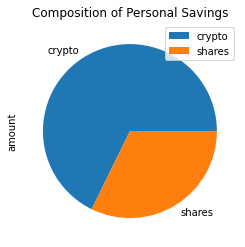

In [56]:
# Plot savings pie chart
pie_fig = df_savings.plot.pie(y="amount", title="Composition of Personal Savings")

In [57]:
pie_fig.get_figure().savefig("Composition of Personal Savings.png", bbox_inches="tight")

In [22]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

In [23]:
# Calculate total amount of savings
total_savings = df_savings["amount"].sum()
total_savings

136663.35161399998

In [24]:
# Validate saving health
if total_savings > emergency_fund:
    print(f"Congratulations! You have enough money in your emergency fund.")
elif total_savings == emergency_fund:
    print(f"Congratulations! You have reached a financial goal: Your savings is equal to your emergency fund.")
else:
    print(f"Sorry! You don't have enough money in your emergency fund. You will need ${emergency_fund - total_savings} to reach your financial goal") 

Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [25]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2017-03-28', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2022-03-28', tz='America/New_York').isoformat()

In [26]:
# Create the Alpaca API object
historical_data = trade_api.REST(alpaca_api_key, alpaca_secret_key, api_version='v2')

# Get 5 years' worth of historical data for SPY and AGG
df_stock_data = historical_data.get_bars(tickers, timeframe, start=start_date, end=end_date).df

df_stock_data

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2017-03-28 04:00:00+00:00,108.63,108.68,108.35,108.37,2016097,9144,108.514754,AGG
2017-03-29 04:00:00+00:00,108.48,108.62,108.46,108.61,1965626,10135,108.539517,AGG
2017-03-30 04:00:00+00:00,108.52,108.58,108.38,108.41,1733874,8188,108.440472,AGG
2017-03-31 04:00:00+00:00,108.44,108.53,108.42,108.49,3717721,13532,108.485913,AGG
2017-04-03 04:00:00+00:00,108.31,108.68,108.30,108.67,5198006,15992,108.605513,AGG
...,...,...,...,...,...,...,...,...
2022-03-22 04:00:00+00:00,445.99,450.58,445.86,449.59,73674202,623610,448.558595,SPY
2022-03-23 04:00:00+00:00,446.90,448.49,443.71,443.80,77982935,627281,446.058683,SPY
2022-03-24 04:00:00+00:00,445.82,450.50,444.76,450.48,61411569,526865,447.609014,SPY


In [27]:
# Reorganize the DataFrame
# Separate ticker data
AGG = df_stock_data[df_stock_data['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df_stock_data[df_stock_data['symbol']=='SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
df_stock_data = pd.concat([AGG, SPY],axis=1, keys=['AGG','SPY'])


# Display sample data
df_stock_data.head()

AGG                                   \
                             open    high     low   close   volume   
timestamp                                                            
2017-03-28 04:00:00+00:00  108.63  108.68  108.35  108.37  2016097   
2017-03-29 04:00:00+00:00  108.48  108.62  108.46  108.61  1965626   
2017-03-30 04:00:00+00:00  108.52  108.58  108.38  108.41  1733874   
2017-03-31 04:00:00+00:00  108.44  108.53  108.42  108.49  3717721   
2017-04-03 04:00:00+00:00  108.31  108.68  108.30  108.67  5198006   

                                                      SPY                   \
                          trade_count        vwap    open    high      low   
timestamp                                                                    
2017-03-28 04:00:00+00:00        9144  108.514754  233.32  235.81  233.140   
2017-03-29 04:00:00+00:00       10135  108.539517  235.00  235.81  234.725   
2017-03-30 04:00:00+00:00        8188  108.440472  235.50  236.52  235.270   
2017-03-31 04:00:00+00:00       13532  108.485913  235.91  236.51  235.680   
2017-04-03 04:00:00+00:00       15992  108.605513  235.79  236.03  233.910   

                                                                     
                            close    volume trade_count        vwap  
timestamp                                                            
2017-03-28 04:00:00+00:00  235.32  93483915      277352  234.596748  
2017-03-29 04:00:00+00:00  235.54  61950354      194177  235.429910  
2017-03-30 04:00:00+00:00  236.29  56737890      180049  236.126775  
2017-03-31 04:00:00+00:00  235.74  73733094      207326  236.011666  
2017-04-03 04:00:00+00:00  235.33  85546486      278486  235.194832

In [28]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# Configure and execute a Monte Carlo Simulation of 500 runs and 30 years for the 40/60 portfolio.

MC_thirtyyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [29]:
# Printing the simulation input data
MC_thirtyyear.portfolio_data.head()

AGG                                   \
                             open    high     low   close   volume   
timestamp                                                            
2017-03-28 04:00:00+00:00  108.63  108.68  108.35  108.37  2016097   
2017-03-29 04:00:00+00:00  108.48  108.62  108.46  108.61  1965626   
2017-03-30 04:00:00+00:00  108.52  108.58  108.38  108.41  1733874   
2017-03-31 04:00:00+00:00  108.44  108.53  108.42  108.49  3717721   
2017-04-03 04:00:00+00:00  108.31  108.68  108.30  108.67  5198006   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2017-03-28 04:00:00+00:00        9144  108.514754          NaN  233.32   
2017-03-29 04:00:00+00:00       10135  108.539517     0.002215  235.00   
2017-03-30 04:00:00+00:00        8188  108.440472    -0.001841  235.50   
2017-03-31 04:00:00+00:00       13532  108.485913     0.000738  235.91   
2017-04-03 04:00:00+00:00       15992  108.605513     0.001659  235.79   

                                                                          \
                             high      low   close    volume trade_count   
timestamp                                                                  
2017-03-28 04:00:00+00:00  235.81  233.140  235.32  93483915      277352   
2017-03-29 04:00:00+00:00  235.81  234.725  235.54  61950354      194177   
2017-03-30 04:00:00+00:00  236.52  235.270  236.29  56737890      180049   
2017-03-31 04:00:00+00:00  236.51  235.680  235.74  73733094      207326   
2017-04-03 04:00:00+00:00  236.03  233.910  235.33  85546486      278486   

                                                    
                                 vwap daily_return  
timestamp                                           
2017-03-28 04:00:00+00:00  234.596748          NaN  
2017-03-29 04:00:00+00:00  235.429910     0.000935  
2017-03-30 04:00:00+00:00  236.126775     0.003184  
2017-03-31 04:00:00+00:00  236.011666    -0.002328  
2017-04-03 04:00:00+00:00  235.194832    -0.001739

In [30]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirtyyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\cgarnett\Fintech\API-Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.002305,1.002381,1.012435,1.006290,0.999381,1.002916,0.993580,1.009088,1.002505,0.993472,...,0.998391,1.008391,1.007783,0.998365,0.999497,0.999507,1.002361,0.997882,1.022483,1.002178
2,0.994737,0.998926,1.022261,1.013806,1.007715,1.014646,1.005146,1.020984,0.999724,0.984109,...,0.995334,1.021060,1.001189,0.997329,1.003136,1.005846,0.993706,1.000681,1.024341,1.009849
3,0.987808,1.002025,1.021517,1.012300,1.012328,1.010798,1.013154,1.012148,1.004286,0.975305,...,0.998791,1.021254,1.002954,1.002052,1.000708,1.002411,0.992236,0.995495,1.015442,1.002694
4,0.987276,0.993737,1.022079,1.019170,1.009799,0.998649,1.010348,1.006731,1.001922,0.975405,...,1.011076,1.027859,1.002647,0.999181,1.001221,1.007127,1.003155,1.006122,1.019941,0.995690
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,31.806730,4.437415,7.428322,5.530126,16.099308,11.842312,14.069814,11.142663,6.730108,17.176125,...,10.552908,31.862638,6.732042,10.382209,25.764871,11.483256,12.534214,12.124625,25.182847,19.739062
7557,31.936593,4.463186,7.466701,5.554218,16.203112,11.746310,14.073205,11.242246,6.652368,16.971430,...,10.699277,31.965585,6.684621,10.302169,25.733743,11.354520,12.394544,11.971018,24.986775,19.664823
7558,31.735029,4.472186,7.477878,5.606304,16.261733,11.803264,14.312461,11.226965,6.591442,16.776693,...,10.715253,31.835574,6.623657,10.220485,25.878014,11.245734,12.265925,12.040021,24.784494,19.561818
7559,31.562565,4.512063,7.470306,5.599882,16.423564,11.623351,14.501791,11.185929,6.603894,16.861152,...,10.636995,32.063735,6.618761,10.204351,26.133391,11.116700,12.142236,12.110578,24.607741,19.427293


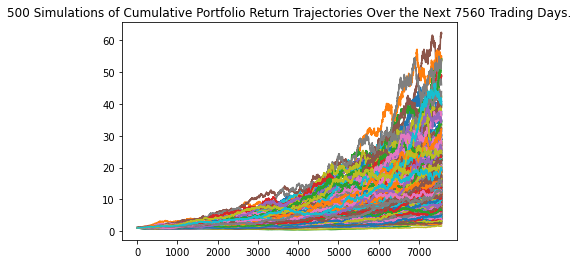

In [31]:
# Plot simulation outcomes
line_plot = MC_thirtyyear.plot_simulation()

In [32]:
line_plot.get_figure().savefig("MC_thirtyyear_sim_plot.png", bbox_inches="tight")

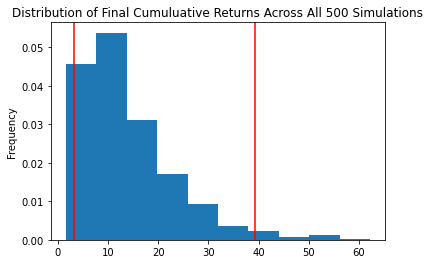

In [33]:
# Plot probability distribution and confidence intervals
dist_plot = MC_thirtyyear.plot_distribution()

In [54]:
dist_plot.get_figure().savefig("thirtyyear_dist_plot.png", bbox_inches="tight")

### Retirement Analysis

In [34]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_thirtyyear.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean             13.947630
std               9.479214
min               1.612828
25%               6.965675
50%              11.276704
75%              17.643150
max              62.197317
95% CI Lower      3.273786
95% CI Upper     39.322328
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [35]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*20000,2)
ci_upper = round(tbl[9]*20000,2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $65475.72 and $786446.55


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [36]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8]*30000,2)
ci_upper = round(tbl[9]*30000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $98213.57 and $1179669.83


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [37]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# Configure and execute a Monte Carlo Simulation of 500 runs and 5 years for the 40/60 portfolio.
MC_fiveyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*5
)


In [38]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_fiveyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\cgarnett\Fintech\API-Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.991779,1.002096,0.983234,1.021119,0.988541,1.008533,0.994619,0.999581,0.998811,1.000013,...,1.011772,0.993567,0.996033,1.011882,1.002924,1.004571,1.004309,1.004945,0.997380,1.009640
2,0.997765,1.013011,0.975352,1.028327,0.989847,1.013631,0.993179,0.996865,0.977771,0.989196,...,1.030720,0.992531,0.998002,1.023710,1.007679,1.005381,1.006801,0.999413,1.003936,1.008624
3,0.989796,1.000060,0.977583,1.037615,0.978864,1.027880,1.000440,0.992770,0.975392,0.993292,...,1.035850,0.981663,0.991127,1.032127,1.005913,1.006048,1.014825,0.997930,1.010285,1.000194
4,0.983097,1.002919,0.970163,1.044778,0.988639,1.024708,1.001700,0.999104,0.975595,0.977424,...,1.035954,0.996048,1.001688,1.041483,0.998137,0.996942,1.011336,1.000592,1.020468,0.995686
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.680435,1.342443,1.700809,1.034998,2.264052,1.452936,1.312481,1.410908,1.487543,1.106538,...,1.398586,1.523026,1.508333,1.623260,1.503857,1.054411,1.553732,0.938510,1.829143,1.659917
1257,1.697341,1.334587,1.699462,1.039616,2.257827,1.468316,1.313538,1.401338,1.497891,1.103413,...,1.385751,1.535881,1.502811,1.627078,1.511432,1.066949,1.551221,0.939257,1.840953,1.657010
1258,1.707749,1.325604,1.700642,1.052008,2.218864,1.465316,1.323562,1.408377,1.509756,1.105849,...,1.386260,1.542791,1.507578,1.628589,1.519498,1.060121,1.557502,0.931296,1.847162,1.663290
1259,1.697971,1.335412,1.696853,1.065298,2.226415,1.471103,1.314290,1.407066,1.517645,1.114660,...,1.403774,1.550692,1.513069,1.634138,1.551555,1.048428,1.552020,0.933455,1.842144,1.673741


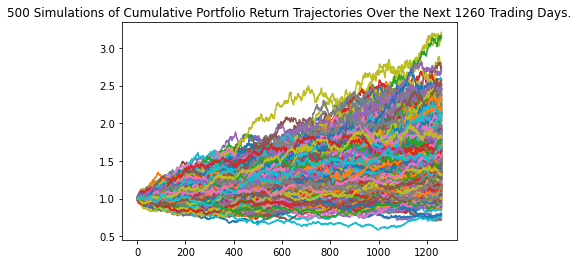

In [39]:
# Plot simulation outcomes
line_plot_five = MC_fiveyear.plot_simulation()

In [40]:
line_plot_five.get_figure().savefig("MC_fiveyear_sim_plot.png", bbox_inches="tight")

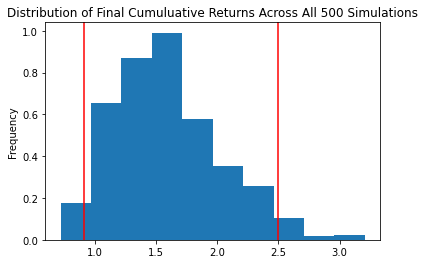

In [41]:
# Plot probability distribution and confidence intervals
dist_plot_five = MC_fiveyear.plot_distribution()

In [53]:
dist_plot_five.get_figure().savefig("fiveyear_dist_plot.png", bbox_inches="tight")

In [42]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_five = MC_fiveyear.summarize_cumulative_return()

# Print summary statistics
print(tbl_five)


count           500.000000
mean              1.594845
std               0.430214
min               0.722087
25%               1.290131
50%               1.544924
75%               1.845630
max               3.205585
95% CI Lower      0.909726
95% CI Upper      2.500430
Name: 1260, dtype: float64


In [43]:
# Set initial investment
initial_investment = 20000 * 3

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(tbl[8]*60000,2)
ci_upper_five = round(tbl[9]*60000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $196427.15 and $2359339.66


### Ten Years Retirement Option

In [44]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# Configure and execute a Monte Carlo Simulation of 500 runs and 10 years for the 40/60 portfolio.

MC_tenyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [45]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_tenyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\cgarnett\Fintech\API-Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.008288,1.000698,0.995135,1.003503,0.997017,1.003204,1.005405,1.000484,0.991440,0.994724,...,0.997996,0.992091,0.993830,1.014759,1.013348,0.995710,0.996448,0.999336,1.002493,0.989996
2,1.003909,0.997639,1.004695,1.019829,0.992457,0.996706,1.003038,0.997342,0.987627,0.982267,...,0.998645,0.992164,0.994920,1.009387,1.023721,0.991000,1.004526,1.010370,0.993807,0.984927
3,1.014729,0.997141,1.011119,1.027289,0.978733,1.007943,1.004059,0.999565,0.993371,0.977673,...,0.998323,0.991319,0.996049,0.990474,1.025152,0.980786,1.005996,1.017074,0.977214,0.973640
4,1.006472,1.003949,1.002881,1.032863,0.979867,1.016788,1.000895,1.003462,1.008207,0.986637,...,0.996409,0.990788,1.002495,0.990761,1.034266,0.996698,1.012381,1.019304,0.972012,0.978977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.388616,1.779766,0.966072,1.865357,2.178927,6.188399,2.779155,2.130927,2.677001,2.788313,...,3.405521,3.569055,2.819014,1.956364,2.164079,1.919592,1.932406,3.821794,1.431922,4.523684
2517,2.431560,1.777997,0.967500,1.865221,2.166657,6.093682,2.784199,2.133644,2.676945,2.772821,...,3.382859,3.573092,2.835948,1.957564,2.161932,1.910887,1.933209,3.847992,1.440073,4.531956
2518,2.437496,1.789197,0.965193,1.839425,2.196912,6.008098,2.796360,2.137617,2.601435,2.784228,...,3.342351,3.574910,2.814926,1.930507,2.165785,1.919922,1.932121,3.854683,1.454131,4.497905
2519,2.429251,1.809927,0.965553,1.831786,2.214004,6.015243,2.816326,2.181828,2.605146,2.809600,...,3.336262,3.558563,2.824986,1.910615,2.167003,1.935709,1.931007,3.863886,1.459271,4.531479


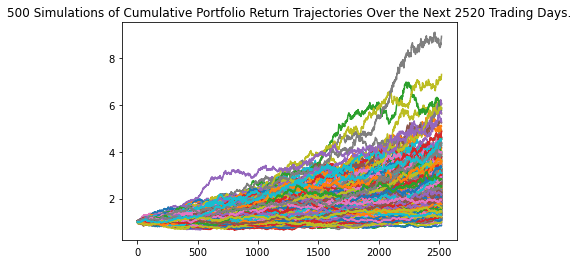

In [46]:
# Plot simulation outcomes
line_plot_ten = MC_tenyear.plot_simulation()

In [47]:
line_plot_ten.get_figure().savefig("MC_tenyear_sim_plot.png", bbox_inches="tight")

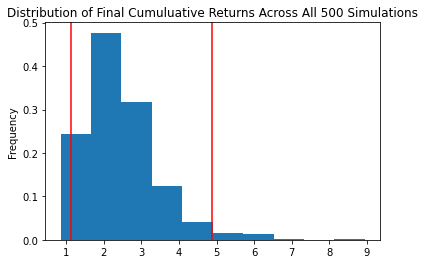

In [48]:
# Plot probability distribution and confidence intervals
dist_plot_ten = MC_tenyear.plot_distribution()

In [52]:
dist_plot_ten.get_figure().savefig("tenyear_dist_plot.png", bbox_inches="tight")

In [49]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_ten = MC_tenyear.summarize_cumulative_return()

# Print summary statistics
print(tbl_ten)


count           500.000000
mean              2.468767
std               1.001390
min               0.850294
25%               1.780305
50%               2.283910
75%               2.950179
max               8.945759
95% CI Lower      1.117773
95% CI Upper      4.892655
Name: 2520, dtype: float64


In [50]:
# Set initial investment
initial_investment = 20000 * 3

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(tbl[8]*60000,2)
ci_upper_ten = round(tbl[9]*60000,2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $196427.15 and $2359339.66
